In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from collections import Counter


In [2]:
# read in the data
df = pd.read_csv("data.csv")



In [3]:
# check the head of the dataset
df.head(5)


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [5]:
# check the info of the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   A1_Score         704 non-null    int64 
 1   A2_Score         704 non-null    int64 
 2   A3_Score         704 non-null    int64 
 3   A4_Score         704 non-null    int64 
 4   A5_Score         704 non-null    int64 
 5   A6_Score         704 non-null    int64 
 6   A7_Score         704 non-null    int64 
 7   A8_Score         704 non-null    int64 
 8   A9_Score         704 non-null    int64 
 9   A10_Score        704 non-null    int64 
 10  age              704 non-null    object
 11  gender           704 non-null    object
 12  ethnicity        704 non-null    object
 13  jundice          704 non-null    object
 14  austim           704 non-null    object
 15  contry_of_res    704 non-null    object
 16  used_app_before  704 non-null    object
 17  result           704 non-null    in

In [6]:
# print the shape of the dataset as well as the number null values
shp = df.shape
ina = len(df.columns[df.isna().any()])
nna = len(df.columns[df.notna().all()])
col = len(df.columns)
print(
    f"Shape of the dataset is {shp}"
    f"\n{ina} columns containing null values"
    f"\n{nna} columns containing no null values"
    f" \n{col} columns in total"
)



Shape of the dataset is (704, 21)
0 columns containing null values
21 columns containing no null values 
21 columns in total


Text(0, 0.5, 'Number of participants')

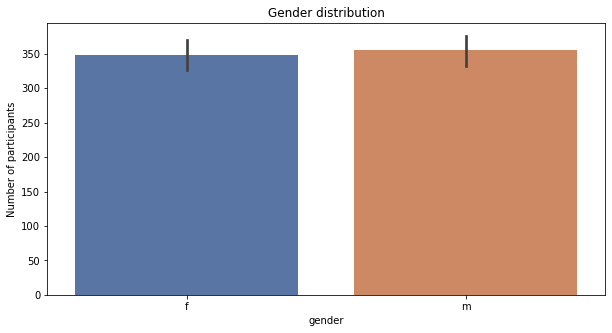

In [10]:
# Plot the distribution of gender in the dataset
plt.figure(figsize=(10, 5))
plt.title("Gender distribution")
sns.barplot(x=df["gender"], y=df.index, palette="deep")
plt.ylabel("Number of participants")



Text(0, 0.5, 'ASD 10 score')

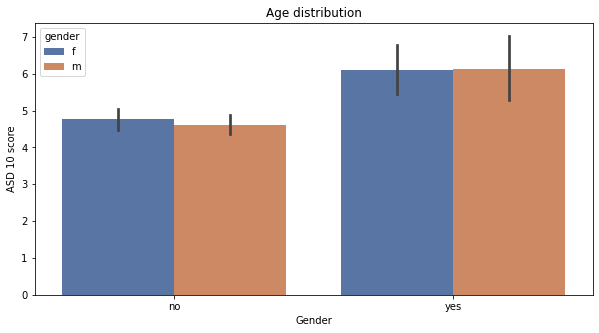

In [11]:
# Plot the results of the age of each gender
plt.figure(figsize=(10, 5))
plt.title("Age distribution")
sns.barplot(x="austim", y="result", hue="gender", data=df, palette="deep")
plt.xlabel("Gender")
plt.ylabel("ASD 10 score")



<AxesSubplot:title={'center':'AS Scores'}>

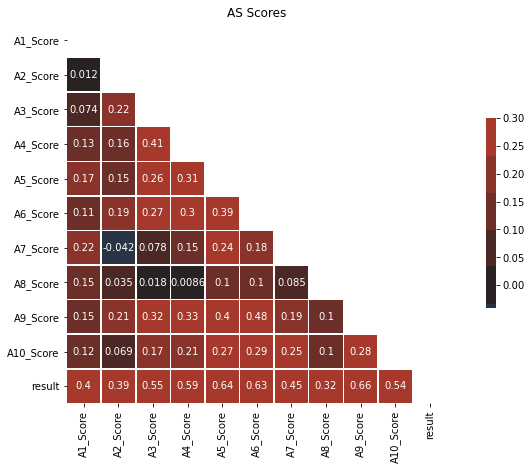

In [12]:
# Create a heatmap of the ASD 10 scores
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
corr = df.corr()
cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="dark")

plt.figure(figsize=(14, 7))
plt.title("AS Scores")
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap=cmap,
    vmax=0.3,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)



In [13]:
# Make a new dataframe with only the variables we want to use
# in this case it is the Countries of Origin
cont_res = Counter(df["contry_of_res"].tolist())
cont_res = pd.DataFrame.from_dict(cont_res, orient="index")
cont_res.columns = ["count"]
cont_res.sort_values(by="count", ascending=False, inplace=True)



Text(0.5, 0, 'Total number of participants')

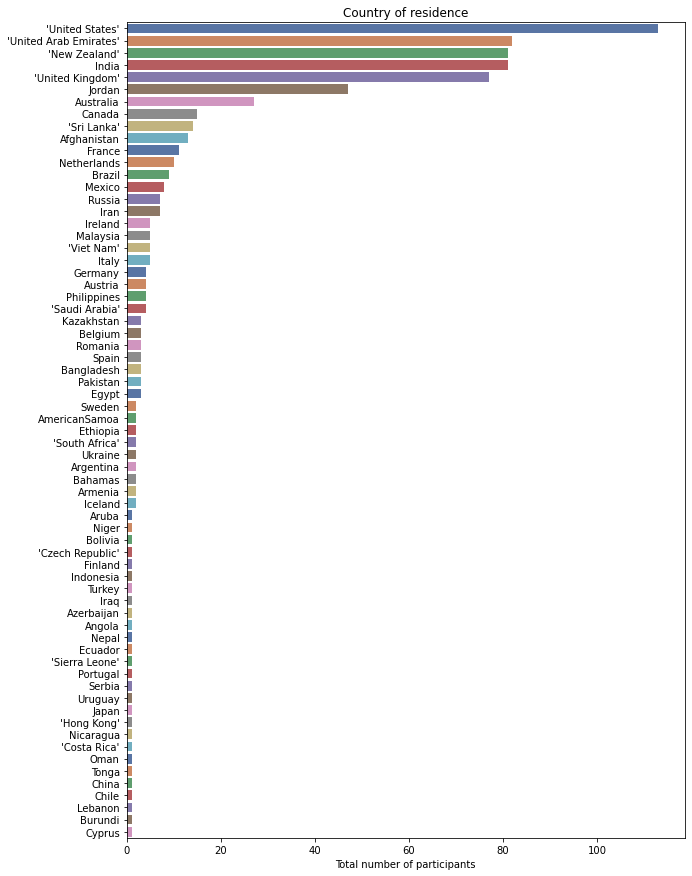

In [14]:
# Plot the results
plt.figure(figsize=(10, 15))
plt.title("Country of residence")
sns.barplot(x=cont_res["count"], y=cont_res.index, palette="deep")
plt.xlabel("Total number of participants")



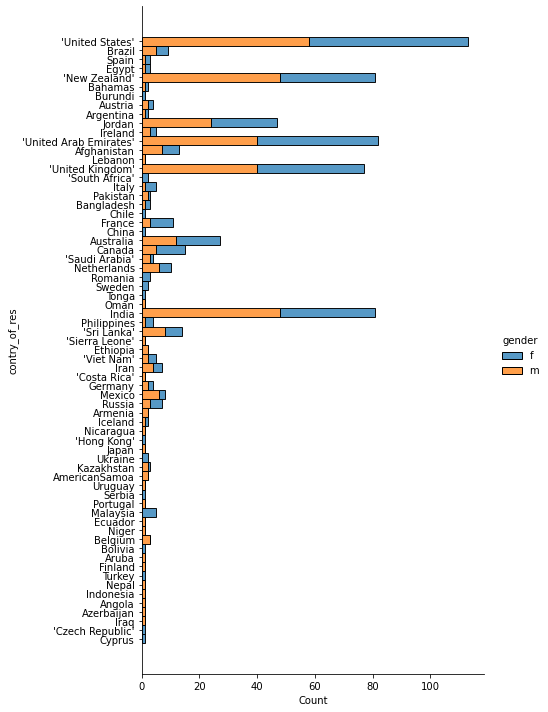

In [38]:
sns.displot(
    data=df, y="contry_of_res", hue="gender", multiple="stack", height=10, aspect=0.7
)

